In [11]:
import numpy as np

In [12]:
# Create the appropriate arrays
A = np.zeros([5,5])
b = np.zeros(5)
An = np.zeros(5)
Gamma = np.zeros(100)

In [13]:
# Define the points at which PLLT is applied
# and the =n visualized
#y = np.linspace(-5, 5, 5)
theta = np.linspace(0, np.pi, 5)
#theta = np.arccos(-y/5.)
the_plot = np.linspace(0, np.pi, 100)
y_plot = -5.*np.cos(the_plot)

In [14]:
# Set up the system of equations

# Use this approach if you go from pi/2 to pi
#A[0,0] = 10./np.pi+1
#A[0,2] = -(10./np.pi+3)
#A[0,4] = (10./np.pi+5)

# Use this approach if you go from 0 to pi
A[0,0] = 1.0
A[0,1] = 4.0
A[0,2] = 9.0
A[0,3] = 16.0
A[0,4] = 25.0

b[0] = np.pi/45.
for i in range(1,4):
    A[i,0] = (10./np.pi+1./np.sin(theta[i]))*np.sin(theta[i])
    A[i,1] = (10./np.pi+2./np.sin(theta[i]))*np.sin(2.*theta[i])
    A[i,2] = (10./np.pi+3./np.sin(theta[i]))*np.sin(3.*theta[i])
    A[i,3] = (10./np.pi+4./np.sin(theta[i]))*np.sin(4.*theta[i])
    A[i,4] = (10./np.pi+5./np.sin(theta[i]))*np.sin(5.*theta[i])
    b[i] = np.pi/45.
A[4,0] = 1.0
A[4,1] = -4.0
A[4,2] = 9.0
A[4,3] = -16.0
A[4,4] = 25.0
b[4] = np.pi/45.

In [15]:
## gaussElimin

from numpy import dot

def gaussElimin(a,b):
    '''x = gaussElimin(a,b)
Solves Ax = b by Gauss elimination
'''
    
    n = len(b)
    for k in range(0,n-1):
        for i in range(k+1,n):
            if a[i,k] != 0.0:
                lam = a[i,k]/a[k,k]
                a[i,k+1:n] = a[i,k+1:n] - lam*a[k,k+1:n]
                b[i] = b[i] - lam*b[k]
    for k in range(n-1,-1,-1):
        b[k] = (b[k] - dot(a[k,k+1:n],b[k+1:n]))/a[k,k]
    return b

In [16]:
An = gaussElimin(A,b)
print(An)

[ 1.90204144e-02 -0.00000000e+00  2.88933593e-03  9.79959257e-19
  9.91549290e-04]


In [17]:
for i in range(100):
    Gamma[i] = 500.*(An[0]*np.sin(the_plot[i])+An[1]*np.sin(2.*the_plot[i])+An[2]*np.sin(3.*the_plot[i])
                    +An[3]*np.sin(4.*the_plot[i])+An[4]*np.sin(5.*the_plot[i]))

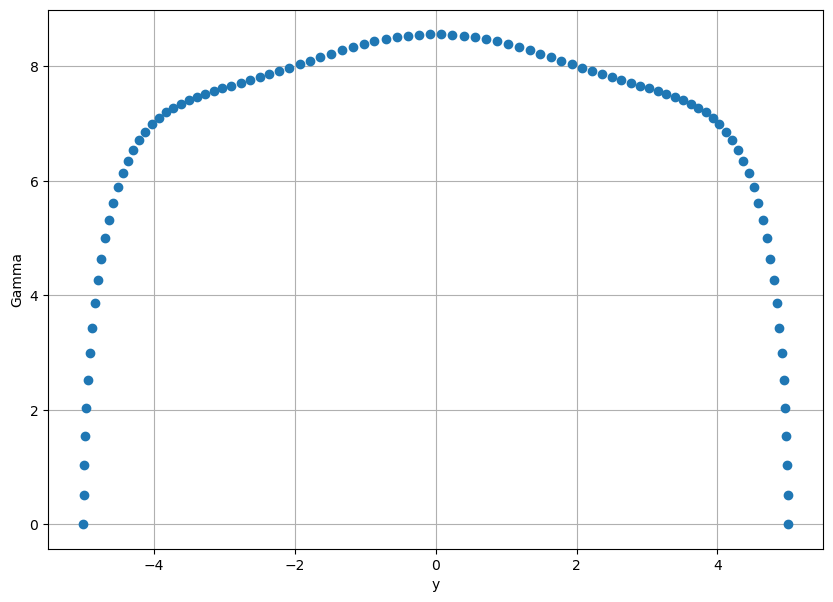

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
# Create a fig and plot

fig, ax = plt.subplots()
ax.plot(y_plot, Gamma, 'o')
ax.set_xlabel('y')
ax.set_ylabel('Gamma')
fig.set_size_inches([10, 7])
ax.grid(True)
plt.show()